HW09 

Charles Lehman

In [0]:
from scipy.io import loadmat
from scipy.special import legendre
from scipy.integrate import quad
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
from tqdm import tqdm

# 1. 

This last week emphasized on the generation of estimators in preparation for discussions into the fundamental theorem of machine learning.  In the context of Cramer-Rao, the utility of unbiased estimators was established.  However, the notable exception of Stein's paradox demonstrated that though in general, unbiased estimators are generally more useful they are not always better. Bayes estimators and classifiers were introduced to bridge the topics of regression and classification to begin discussing classifier risk.  The discussion of risk minimization is a central topic because it is the framework that reveals bounds on possible "hypotheses" that give us important results of what is possible.

# 2. James Stein Estimator

In [15]:
def jse(x, pos=False):
    """
    James-Stein Estimator
    """
    est = 1 - (x.shape[0]-2)/np.sum(x**2)
    if pos:
        if est < 0:
            est = 0.
    est *= x
    return est

D_l = [5,6,7,8,9,10]
for D in D_l:
    manymanytimes = 10000

    theta_0 = (2/np.sqrt(D))*np.ones(D)
    X_ = np.zeros(D)
    mse_ube = 0
    mse_jse = 0
    mse_jsep = 0
    for n in range(manymanytimes):
        X = np.random.randn(D) + theta_0
        mse_ube += np.sum((X - theta_0)**2)
        mse_jse += np.sum((X - jse(X))**2)
        mse_jsep += np.sum((X - jse(X, True))**2)

    mse_ube /= manymanytimes
    mse_jse /= manymanytimes
    mse_jsep /= manymanytimes
    print("{}: ube:{:.3f} jse:{:.3f} jse+:{:.3f}".format(D, mse_ube, mse_jse, mse_jsep))
    

    
    
    


5: ube:5.090 jse:1.509 jse+:1.256
6: ube:5.997 jse:2.264 jse+:1.911
7: ube:6.965 jse:3.053 jse+:2.616
8: ube:7.971 jse:3.928 jse+:3.340
9: ube:9.029 jse:4.738 jse+:4.072
10: ube:9.964 jse:5.629 jse+:4.864


# 3. Poker Game

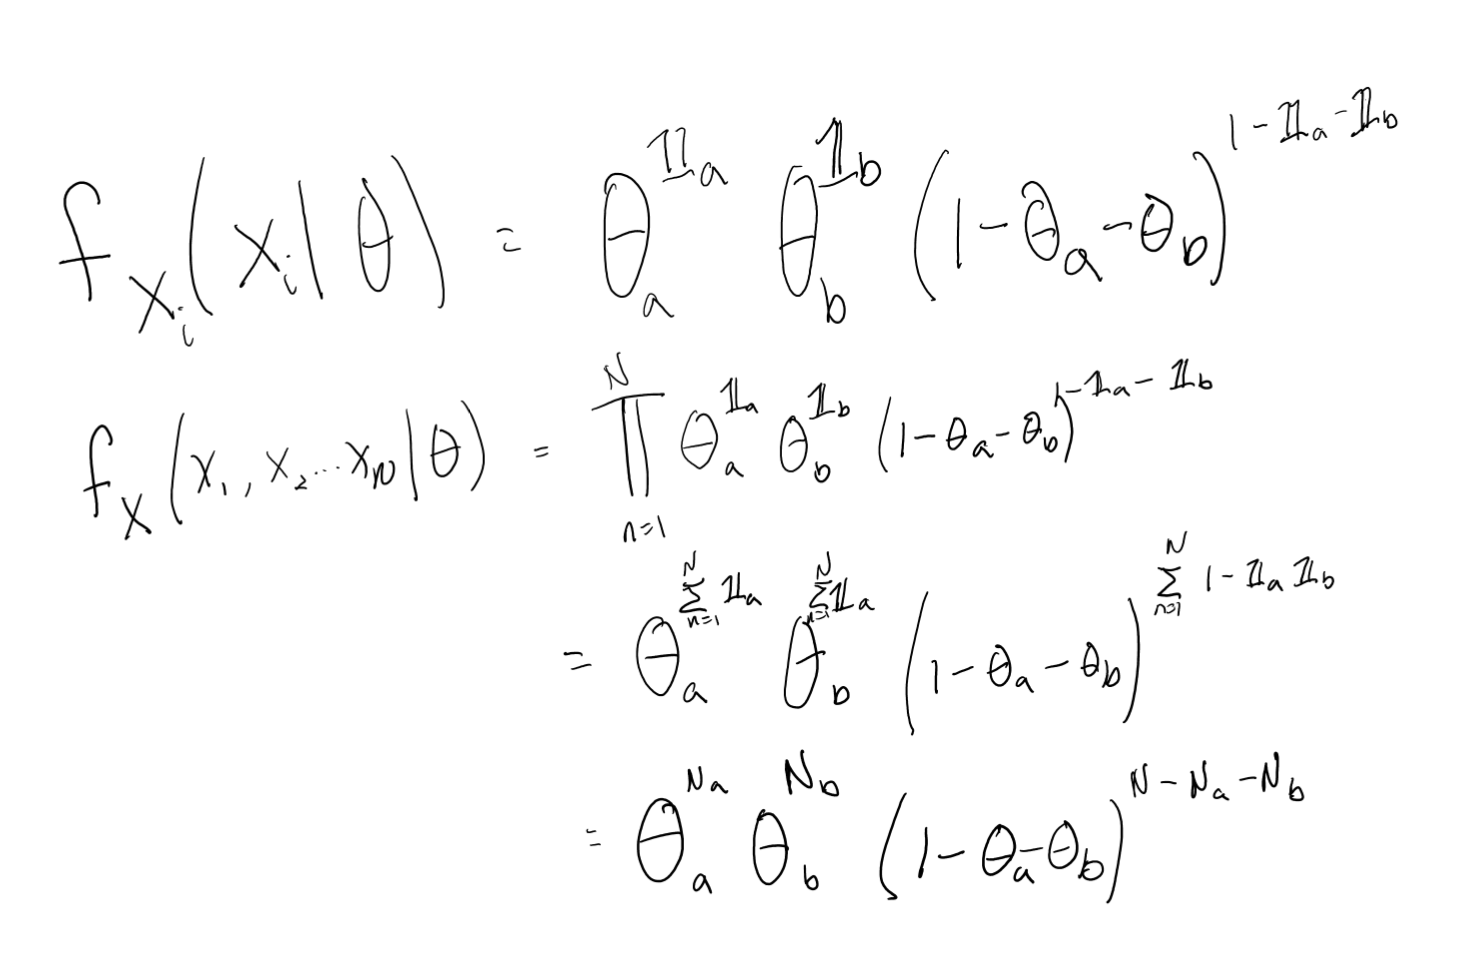

In [3]:
from IPython.display import Image
Image(filename='Screenshot 2018-11-19 at 07.12.40.png', width=500) 

In [0]:
# from http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from functools import reduce

def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

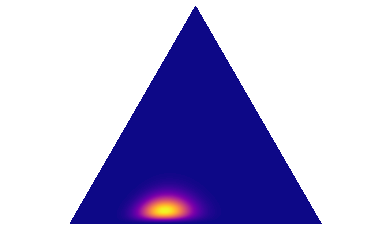

In [16]:
Na = 30
Nb = 18
Nc = 4
draw_pdf_contours(Dirichlet([Na, Nb, Nc]), cmap='plasma')

# 4. Bayes Classifier

Text(0.5,1,'Gamma 2')

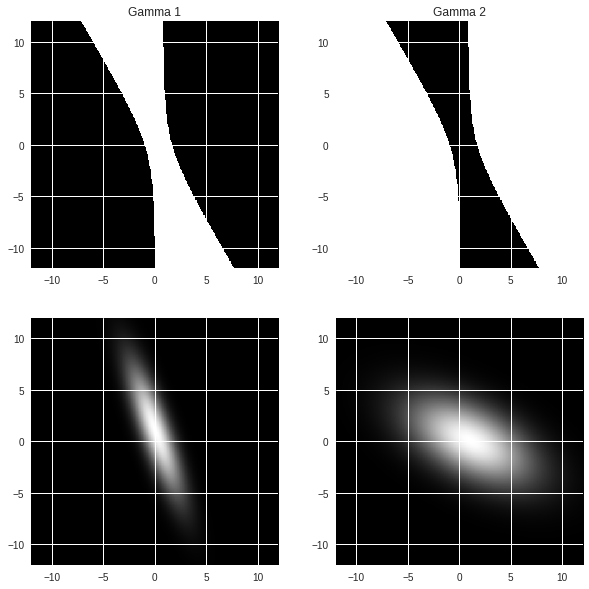

In [98]:
m1 = np.array([0,1]).reshape((1,1,2))
s1 = np.array([[3,-6],[-6, 18]])
s1_i = np.linalg.inv(s1)
den1 = 1/(2*np.pi*np.sqrt(np.linalg.det(s1)))

m2 = np.array([1,0]).reshape(1,1,2)
s2 = np.array([[16,-6],[-6, 8]])
s2_i = np.linalg.inv(s2)
den2 = 1/(2*np.pi*np.sqrt(np.linalg.det(s2)))

d = 12
n = 200
x = np.arange(-d, d, d/n)
y = np.arange(-d, d, d/n)
xx, yy = np.meshgrid(x, y)
X = np.expand_dims(np.stack((xx.flatten('k'),yy.flatten('k')), axis=-1),axis=1)

Y1 = 0.5*den1*np.exp(-0.5*(X-m1)@s1_i@(X-m1).transpose(0,2,1))
Y2 = 0.5*den2*np.exp(-0.5*(X-m2)@s2_i@(X-m2).transpose(0,2,1))
G1 = Y1 > Y2
G2 = Y1 < Y2


fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(G1.reshape(2*n,2*n), extent=[-d, d, -d, d], origin='lower', cmap='gray')
ax[1,0].imshow(Y1.reshape(2*n,2*n), extent=[-d, d, -d, d], origin='lower', cmap='gray')
ax[0,0].set_title('Gamma 1')
ax[0,1].imshow(G2.reshape(2*n,2*n), extent=[-d, d, -d, d], origin='lower', cmap='gray')
ax[1,1].imshow(Y2.reshape(2*n,2*n), extent=[-d, d, -d, d], origin='lower', cmap='gray')
ax[0,1].set_title('Gamma 2')



# 5. hw09p5data

## a.

0.35


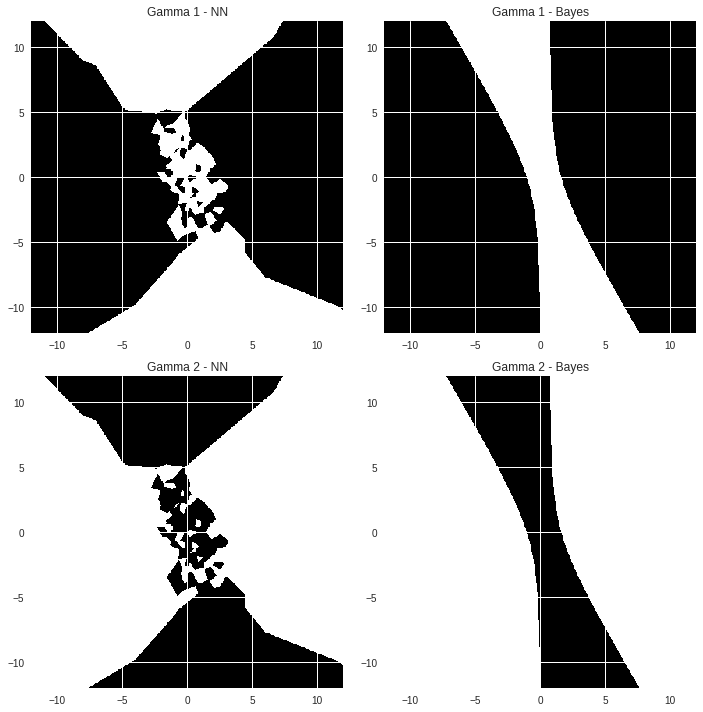

In [153]:
data = loadmat('hw09p5data.mat')
X1 = data['X1']

X2 = data['X2']

Xd = np.concatenate((X1,X2), axis=-1)

d = 12
n = 200
x = np.arange(-d, d, d/n)
y = np.arange(-d, d, d/n)
xx, yy = np.meshgrid(x, y)
X = np.stack((xx.flatten('k'),yy.flatten('k')), axis=0)

pred = []
for x in X.T:
    x = np.expand_dims(x,-1)
    di = np.sum((x-Xd)**2,0)
    di[di==0]=1000
    pred.append(di.argmin() > 99)
    
pred = np.array(pred)*1.
    

fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(pred.reshape(2*n,2*n), extent=[-d, d, -d, d], origin='lower')
ax[0,0].set_title('Gamma 1 - NN')
ax[0,1].imshow(G1.reshape(2*n,2*n), extent=[-d, d, -d, d], origin='lower', cmap='gray')
ax[0,1].set_title('Gamma 1 - Bayes')
ax[1,0].imshow(1-pred.reshape(2*n,2*n), extent=[-d, d, -d, d], origin='lower')
ax[1,0].set_title('Gamma 2 - NN')
ax[1,1].imshow(G2.reshape(2*n,2*n), extent=[-d, d, -d, d], origin='lower', cmap='gray')
ax[1,1].set_title('Gamma 2 - Bayes')
plt.tight_layout()


## b.

In [218]:
data = loadmat('hw09p5data.mat')
X1 = data['X1']

X2 = data['X2']

Xd = np.concatenate((X1,X2), axis=-1)
pred = []
for x in Xd.T:
    x = np.expand_dims(x,-1)
    di = np.sum((x-Xd)**2,0)
    di[di==0]=1000
    pred.append(di.argmin() > 99)
pred = np.array(pred)*1.

corr = np.array([0.]*100 + [1.]*100)
acc = np.logical_and(corr, pred).mean()
print('NN R(hnn): {:.3f}'.format(acc))

N = 100000
X1_ = np.random.randn(N,2)@s1 + m1
X2_ = np.random.randn(N,2)@s2 + m2
X_d = np.concatenate([X1_, X2_],axis=1).transpose(1,0,2)

pred = []
for x in X_d:
    x = np.expand_dims(x,-1)
    di = np.sum((x-Xd)**2,0)
    di[di==0]=1000
    pred.append(di.argmin() > 99)
pred = np.array(pred)*1.
corr = np.array([0.]*N + [1.]*N)
acc_ = np.logical_and(corr, pred).mean()
print('NN R(hnn*): {:.3f}'.format(acc_))
print('Gen:{:.3f}'.format(np.abs(acc-acc_)))

Xd_ = np.expand_dims(Xd,0).transpose(2,0,1)
Y1 = 0.5*den1*np.exp(-0.5*(Xd_-m1)@s1_i@(Xd_-m1).transpose(0,2,1))
Y2 = 0.5*den2*np.exp(-0.5*(Xd_-m2)@s2_i@(Xd_-m2).transpose(0,2,1))
pred = np.array(Y1 < Y2)*1.
corr = np.array([0.]*100 + [1.]*100)
acc = np.logical_and(corr, pred.squeeze()).mean()
print('NN R(bayes): {:.3f}'.format(acc))

Y1 = 0.5*den1*np.exp(-0.5*(X_d-m1)@s1_i@(X_d-m1).transpose(0,2,1))
Y2 = 0.5*den2*np.exp(-0.5*(X_d-m2)@s2_i@(X_d-m2).transpose(0,2,1))
pred = np.array(Y1 < Y2)*1.
corr = np.array([0.]*N + [1.]*N)
acc_ = np.logical_and(corr, pred.squeeze()).mean()
print('NN R(bayes*): {:.3f}'.format(acc_))
print('Gen:{:.3f}'.format(np.abs(acc-acc_)))

NN R(hnn): 0.350
NN R(hnn*): 0.465
Gen:0.115
NN R(bayes): 0.355
NN R(bayes*): 0.441
Gen:0.086
